# Curtiss and Hirschfelder problem

We would like to solve the folowing problem:

$$
    \begin{cases}
        \dot{y} = k(\cos(t) - y)\\
        y(0)  = y_0
    \end{cases}
$$

with $k>1$, a parameter that allows to control the stiffness of the problem.

In [1]:
%system mkdir -p curtiss

[]

In [2]:
%%writefile curtiss/main.cpp

#include <iostream>
#include <valarray>

#include "solver/solver.hpp"
#include "solver/observer.hpp"
#include "solver/problem.hpp"
#include "solver/butcher_methods.hpp"

int main()
{
    using namespace observer;

    double k = 50.0;
    
    double L = -k;
    auto N = [=]( double t, double const& u ) {
        return k*std::cos(t);
    };
    auto pb  = ode::make_lawson_problem(L, N);

    double dt = 0.05;
    double tf = 2;
    double y_ini = 2.0;
    
    auto exp = [](double x){ return std::exp(x); };
    
    ode::solve(pb, ode::butcher::rk_44(), y_ini, {0.,tf}, dt, "curtiss/sol_rk44.dat"_fobs);
    ode::solve(pb, ode::butcher::lrk_44(exp), y_ini, {0.,tf}, dt, "curtiss/sol_lrk44.dat"_fobs);
    ode::solve(pb, ode::butcher::hochbruck_ostermann(), y_ini, {0.,tf}, dt, "curtiss/sol_ho.dat"_fobs);
    ode::solve(pb, ode::butcher::exprk22(), y_ini, {0.,tf}, dt, "curtiss/sol_exprk22.dat"_fobs);
    
    return 0;
}

Overwriting curtiss/main.cpp


In [3]:
%system $CXX -std=c++20 -I ../include curtiss/main.cpp -o curtiss/main

[]

In [4]:
%system ./curtiss/main

[]

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
y0 = 2.0
t0 = 0.0
k = 50.0

def sol(t):
    c0 = (y0 - k/(k**2+1)*( k*np.cos(t0) + np.sin(t0) ))*np.exp(-k*t0)
    return k/(k**2+1)*(k*np.cos(t) + np.sin(t)) + c0*np.exp(-k*t)

time = np.linspace(0, 2, 100)
exact_sol = sol(time)

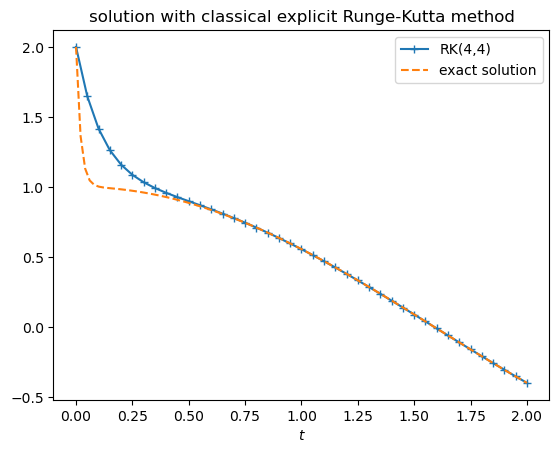

In [7]:
data = np.loadtxt("curtiss/sol_rk44.dat")
t = data[:,0]
y = data[:,1]

plt.plot(t, y, "+-", label="RK(4,4)")
plt.plot(time, exact_sol, "--", label="exact solution")
plt.xlabel("$t$")
plt.title("solution with classical explicit Runge-Kutta method")
plt.legend()
plt.show()

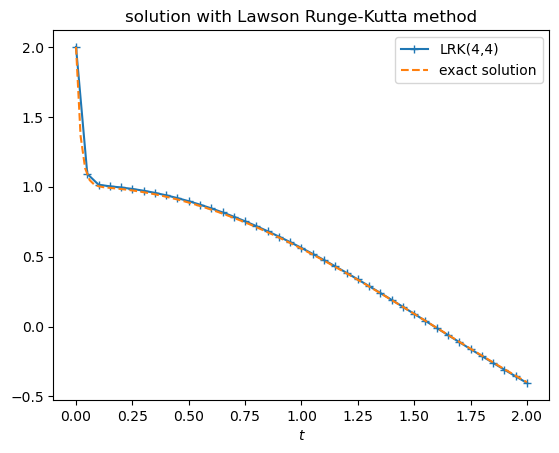

In [8]:
data = np.loadtxt("curtiss/sol_lrk44.dat")
t = data[:,0]
y = data[:,1]

plt.plot(t, y, "+-", label="LRK(4,4)")
plt.plot(time, exact_sol, "--", label="exact solution")
plt.xlabel("$t$")
plt.title("solution with Lawson Runge-Kutta method")
plt.legend()
plt.show()

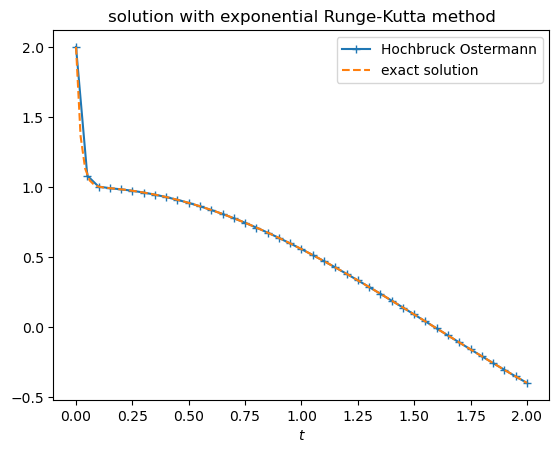

In [9]:
data = np.loadtxt("curtiss/sol_ho.dat")
t = data[:,0]
y = data[:,1]

data_2 = np.loadtxt("curtiss/sol_exprk22.dat")
t_2 = data[:,0]
y_2 = data[:,1]

plt.plot(t, y, "+-", label="Hochbruck Ostermann")
#plt.plot(t_2, y_2, "+-", label="expRK(2,2)")
plt.plot(time, exact_sol, "--", label="exact solution")
plt.xlabel("$t$")
plt.title("solution with exponential Runge-Kutta method")
plt.legend()
plt.show()